In [1]:
# Import pandas and numpy library
import pandas as pd
import numpy as np

In [2]:
# Import data using pandas
iris = pd.read_csv('IRIS.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#Drop label (Y) for dataset

iris_features = iris.drop(columns=['species'])

iris_features.shape

(150, 4)

In [4]:
iris_features

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Standardize Data

In [5]:
#standardize dataset

iris_features = (iris_features - iris_features.mean()) / iris_features.std()

#convert dataframe to numpy array
iris_features = iris_features.to_numpy()

iris_features

array([[-8.97673879e-01,  1.02861128e+00, -1.33679402e+00,
        -1.30859282e+00],
       [-1.13920048e+00, -1.24540379e-01, -1.33679402e+00,
        -1.30859282e+00],
       [-1.38072709e+00,  3.36720285e-01, -1.39346985e+00,
        -1.30859282e+00],
       [-1.50149039e+00,  1.06089953e-01, -1.28011819e+00,
        -1.30859282e+00],
       [-1.01843718e+00,  1.25924161e+00, -1.33679402e+00,
        -1.30859282e+00],
       [-5.35383973e-01,  1.95113261e+00, -1.16676652e+00,
        -1.04652483e+00],
       [-1.50149039e+00,  7.97980949e-01, -1.33679402e+00,
        -1.17755883e+00],
       [-1.01843718e+00,  7.97980949e-01, -1.28011819e+00,
        -1.30859282e+00],
       [-1.74301699e+00, -3.55170711e-01, -1.33679402e+00,
        -1.30859282e+00],
       [-1.13920048e+00,  1.06089953e-01, -1.28011819e+00,
        -1.43962681e+00],
       [-5.35383973e-01,  1.48987194e+00, -1.28011819e+00,
        -1.30859282e+00],
       [-1.25996379e+00,  7.97980949e-01, -1.22344235e+00,
      

# Compute Covariance Matrix

In [6]:
def covariance_matrix(X, n_rows):
  """The function is a matrix multiplication of dataset and the transpose of the dataset.
  See the formula for C in theory section. Mean is not substracted as it was substracted when standardizing the data """
  covariance_matrix = X.T @ X / n_rows
  return covariance_matrix

covariance_matrix(iris_features, 150)

array([[ 0.99333333, -0.10864012,  0.86594246,  0.81250061],
       [-0.10864012,  0.99333333, -0.41771266, -0.35416713],
       [ 0.86594246, -0.41771266,  0.99333333,  0.95633872],
       [ 0.81250061, -0.35416713,  0.95633872,  0.99333333]])

# Compute Eigen Values and Eigen Vectors of Covariance Matrix

In [7]:
def eigen_vectors(X, n_rows):
  C = covariance_matrix(X, n_rows)
  eigen_vectors = np.linalg.eig(C)
  return eigen_vectors

# the function returns two arrays - the first are the eigen values and the second the eigen vectors
eigen_values, eigen_vectors = eigen_vectors(iris_features, 150)

In [8]:
eigen_values

array([2.89141263, 0.91507946, 0.14637092, 0.02047032])

In [9]:
eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

# Sort Eigenvalues

In [10]:
#sort eigenvalues from smallest to greatest magnitude using argsort function

sort = np.argsort(eigen_values)[::-1]

sort

array([0, 1, 2, 3])

In [11]:
# use sort array to order eigenvectors

principal_components = eigen_vectors[:,sort]

principal_components

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

# Create a PCA Function

In [12]:
def PCA_from_Scratch(X, n_rows, n_components):
  X = X.copy()
  X_mean = np.mean(X, axis=0)
  X_std = np.std(X, axis=0)
  Z = (X - X_mean) / X_std
  
  C = Z.T @ Z / n_rows
  eigen_values, eigen_vectors  = np.linalg.eig(C)
  sort = np.argsort(eigen_values)[::-1]
  principal_components = eigen_vectors[:,sort]
  return principal_components[:n_components]


principal_components_2 = PCA_from_Scratch(iris_features, iris_features.shape[0],2)





In [13]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import scipy.io

# Load the hyperspectral image and ground truth data
data = scipy.io.loadmat('Salinas.mat')['salinas']
ground_truth = scipy.io.loadmat('Salinas_gt.mat')['salinas_gt']

# Reshape the data to 2D array (pixels x bands)
n_rows, n_cols, n_bands = data.shape
data_reshaped = data.reshape((n_rows * n_cols, n_bands))

# Apply PCA to reduce dimensions
n_components = 10  # Number of principal components

In [14]:
principal_components_3 = PCA_from_Scratch(data_reshaped, data_reshaped.shape[0],10)


In [15]:

def transform(X,principal_components):
  X = X.copy()
  X_proj = X.dot(principal_components.T)
  return X_proj


# transforming the iris dataset from four dimensions to two dimensions

X_transform = transform(data_reshaped,principal_components_3)

X_transform

array([[-3020.21875985,  -528.70165005,  1786.46831066, ...,
         -356.42577728,  1935.48814992,   863.62473361],
       [-3025.69367159,  -534.28592184,  1793.01527899, ...,
         -365.02436557,  1927.24251321,   870.29573622],
       [-2954.08726791,  -532.54642187,  1760.8062269 , ...,
         -356.65391856,  1886.27140267,   839.99317951],
       ...,
       [-3127.46926192,  -540.32586988,  1893.51598338, ...,
         -367.89558033,  1859.51137671,   838.60116651],
       [-3107.13367963,  -554.37779177,  1884.2879182 , ...,
         -364.15025441,  1878.64083908,   841.64089785],
       [-3137.12735652,  -551.08289707,  1872.37628545, ...,
         -369.18852185,  1883.35994782,   850.2472967 ]])

# Project the Dataset

In [16]:

def transform(X,principal_components):
  X = X.copy()
  X_proj = X.dot(principal_components.T)
  return X_proj


# transforming the iris dataset from four dimensions to two dimensions

X_transform = transform(iris_features,principal_components_2)

X_transform

array([[-0.23088481, -0.8767372 ],
       [ 0.07228808,  0.25417702],
       [-0.18475015, -0.12285598],
       [-0.24369402,  0.14984386],
       [-0.37983604, -1.058395  ],
       [-0.43903851, -1.81737315],
       [-0.42610319, -0.52052364],
       [-0.24896446, -0.61775478],
       [-0.15726062,  0.62665647],
       [-0.08877438,  0.07069892],
       [-0.25423489, -1.38535342],
       [-0.41599533, -0.54043014],
       [-0.02512557,  0.30224651],
       [-0.21794949,  0.42011231],
       [-0.13691264, -2.19410431],
       [-0.59739962, -3.00752582],
       [-0.27558159, -1.87224281],
       [-0.19655448, -0.89300308],
       [-0.19825096, -1.6830567 ],
       [-0.49502244, -1.51966987],
       [-0.07835963, -0.71753438],
       [-0.3748242 , -1.32247435],
       [-0.46871241, -0.98605022],
       [-0.0787507 , -0.4574598 ],
       [-0.53858802, -0.4992779 ],
       [ 0.05364295,  0.24980824],
       [-0.22116803, -0.63656912],
       [-0.20866572, -0.8948234 ],
       [-0.08193358,

# PCA using Scikit Learn Library

In [17]:
from sklearn.decomposition import PCA



In [25]:
#initialize Scikit PCA
pca = PCA(n_components=10)

#Fit Scikit PCA using data
pca.fit(data_reshaped)

PCA(n_components=10)

In [29]:
# generate principal components

SKL_PCA_components = pca.components_.T

SKL_PCA_components


array([[-3.30756290e-04,  9.22681656e-03,  1.33653941e-02, ...,
         2.00194157e-01,  2.84433117e-01,  8.35298403e-02],
       [-1.21207748e-03,  1.29459722e-02,  1.75991353e-02, ...,
         3.09530664e-01,  4.62619424e-01,  1.72166033e-01],
       [-3.35184663e-03,  2.05563888e-02,  2.92266942e-02, ...,
         3.30999750e-01,  3.54204543e-01,  6.75966546e-02],
       ...,
       [-8.42972004e-04,  1.39276813e-03,  8.91801654e-04, ...,
        -5.17320145e-03, -4.68981008e-03,  1.50646377e-02],
       [-1.34032579e-03,  2.20866633e-03,  1.36399525e-03, ...,
        -7.68701665e-03, -6.98395023e-03,  2.15802256e-02],
       [-7.23105601e-04,  1.21014692e-03,  7.28356642e-04, ...,
        -4.61253211e-03, -3.91336734e-03,  1.32533556e-02]])

In [27]:
#Principal components from Scikit library are similar to derived Principal components
principal_components_3

array([[ 3.41798072e-02,  4.86057051e-02,  5.37708686e-03, ...,
        -1.42352254e-05, -2.05202048e-05, -5.32133217e-05],
       [ 4.04835002e-02,  4.75988269e-02,  8.92874904e-03, ...,
         1.69693087e-05,  5.17544327e-06, -1.07679153e-05],
       [ 5.49735107e-02,  5.03506568e-02,  1.47245722e-02, ...,
        -1.44493179e-05,  9.75050958e-05, -2.37118236e-05],
       ...,
       [ 6.98746049e-02,  5.22511168e-02,  2.57644900e-02, ...,
        -4.18382794e-04, -4.91664801e-04, -1.28067969e-04],
       [ 7.11175130e-02,  5.10244395e-02,  2.60963105e-02, ...,
         3.91440991e-04,  1.41434980e-03,  4.56118473e-04],
       [ 7.18909496e-02,  5.02769167e-02,  2.61127895e-02, ...,
        -1.11435642e-03,  4.60830254e-04, -5.57237197e-04]])

In [21]:
def PCA_from_Scratch(X, n_rows, n_components):
  X = X.copy()
  X_mean = np.mean(X, axis=0)
  X_std = np.std(X, axis=0)
  Z = (X - X_mean) / X_std
  
  C = Z.T @ Z / n_rows
  eigen_values, eigen_vectors  = np.linalg.eig(C)
  sort = np.argsort(eigen_values)[::-1]
  principal_components = eigen_vectors[:,sort]
  return principal_components[:n_components]


principal_components_2 = PCA_from_Scratch(iris_features, iris_features.shape[0],2)





In [22]:
principal_components_2

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481]])

In [23]:
#initialize Scikit PCA
pca = PCA(n_components=4)

#Fit Scikit PCA using data
pca.fit(iris_features)

PCA(n_components=4)

In [24]:
# generate principal components

SKL_PCA_components = pca.components_.T

SKL_PCA_components


array([[ 0.52237162,  0.37231836,  0.72101681, -0.26199559],
       [-0.26335492,  0.92555649, -0.24203288,  0.12413481],
       [ 0.58125401,  0.02109478, -0.14089226,  0.80115427],
       [ 0.56561105,  0.06541577, -0.6338014 , -0.52354627]])

Number of clusters: 17


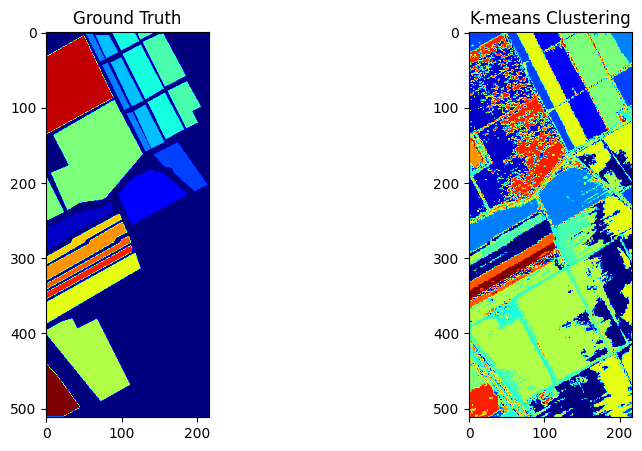

Clustering accuracy: 0.17


In [30]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import scipy.io

# Load the hyperspectral image and ground truth data
data = scipy.io.loadmat('Salinas.mat')['salinas']
ground_truth = scipy.io.loadmat('Salinas_gt.mat')['salinas_gt']

# Reshape the data to 2D array (pixels x bands)
n_rows, n_cols, n_bands = data.shape
data_reshaped = data.reshape((n_rows * n_cols, n_bands))

# PCA Implementation using NumPy
def pca_numpy(data, n_components):
    # Step 1: Standardize the data
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    data_std = (data - mean) / std

    # Step 2: Compute the covariance matrix
    covariance_matrix = np.cov(data_std, rowvar=False)

    # Step 3: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Step 4: Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Step 5: Select the top `n_components` eigenvectors
    top_eigenvectors = eigenvectors[:, :n_components]

    # Step 6: Project the data onto the top eigenvectors
    data_reduced = np.dot(data_std, top_eigenvectors)

    return data_reduced

# Apply PCA to reduce dimensions
n_components = 10  # Number of principal components
data_pca = pca_numpy(data_reshaped, n_components)

# Perform k-means clustering
n_clusters = len(np.unique(ground_truth))  # Number of clusters (including background)
print(f'Number of clusters: {n_clusters}')
kmeans = KMeans(n_clusters=n_clusters, max_iter=10000)
clusters = kmeans.fit_predict(data_pca)

# Reshape clusters to original image shape
clusters_image = clusters.reshape((n_rows, n_cols))

# Plot the clustering results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Ground Truth')
plt.imshow(ground_truth, cmap='jet')
plt.subplot(1, 2, 2)
plt.title('K-means Clustering')
plt.imshow(clusters_image, cmap='jet')
plt.show()

# Compare clustering results with ground truth
ground_truth_flat = ground_truth.flatten()
clusters_flat = clusters
mask = ground_truth_flat > -1  # Exclude background
accuracy = accuracy_score(ground_truth_flat[mask], clusters_flat[mask])
print(f'Clustering accuracy: {accuracy:.2f}')


In [31]:
#print the data
data_pca

array([[  2.19081335, -12.41266018,  -0.06421627, ...,   0.34542735,
         -0.3865106 ,  -0.11170714],
       [  1.94182407, -12.37415817,  -0.20663778, ...,   0.20465278,
          0.45550169,  -0.13589636],
       [  2.37205849, -12.9291027 ,  -1.01000179, ...,   0.34137899,
         -0.38664837,  -0.09729587],
       ...,
       [ -0.99077083, -12.08009731,   0.55333843, ...,  -0.68745753,
         -0.21278753,  -1.38219424],
       [ -1.42887174, -11.99274936,  -0.85662769, ...,  -0.70041755,
          0.28165818,  -1.38982159],
       [ -1.49038084, -11.76625304,  -0.97576029, ...,  -0.20531549,
          0.85868158,  -0.0261941 ]])